In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
from configuration import *
import pandas as pd

from spikeinterface.sortingcomponents.benchmark.benchmark_motion_interpolation import BenchmarkMotionInterpolationMearec

from figure_interpolation import (figure_sorting_accuracies,
                                  figure_sorting_accuracies_with_best_merge,
                                  figure_sorting_accuracies_depth_snr,
                                  figure_waveform_distortion,
                                  convert_sorter_cases,
                                  )

In [6]:
plt.rcParams.update({
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

})

In [7]:
figure_folder = base_folder / 'figures' / 'interpolation'
figure_folder.mkdir(exist_ok=True, parents=True)

ext = 'png'
# ext = 'pdf'

## impact on sorting accuracy

In [8]:
drift_cases = [
    ('uniform', 'homogeneous', 'rigid'),
    ('uniform', 'homogeneous', 'non-rigid'),
    ('uniform', 'homogeneous', 'bumps'),
]

interpolation_method = 'kriging'

In [10]:
benchmarks = {}
for cells_position, cells_rate, drift_mode  in drift_cases:
    benchmark_folder = base_folder / 'bench_interpolation' / f'{probename}_{drift_mode}_{cells_position}_{cells_rate}' / f'{interpolation_method}'
    bench = BenchmarkMotionInterpolationMearec.load_from_folder(benchmark_folder)
    for sorter_case in bench.sorter_cases:
        old = sorter_case['label']
        new = convert_sorter_cases[old]
        sorter_case['label'] = new
        bench.sortings[new] = bench.sortings.pop(old)
    benchmarks[(cells_position, cells_rate, drift_mode)] = bench

In [11]:
# benchmarks[('uniform', 'homogeneous', 'rigid')].sorter_cases
# benchmarks[('uniform', 'homogeneous', 'rigid')].sortings

### ordered accuracies

**********
('uniform', 'homogeneous', 'rigid')
Static - No interpolation
num_gt                256
num_sorter            256
num_well_detected     165
num_overmerged          0
num_redundant           8
num_false_positive     80
num_bad                90
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using GT
num_gt                256
num_sorter            383
num_well_detected     120
num_overmerged          2
num_redundant          64
num_false_positive    159
num_bad               235
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using Mono+Dec
num_gt                256
num_sorter            384
num_well_detected     118
num_overmerged          3
num_redundant          73
num_false_positive    149
num_bad               234
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using KS2.5
num_gt                256
num_sorter            377
num_well_detected     110
num_overmerged          1
num_redundant          91
num_false_positive    127
num_bad  

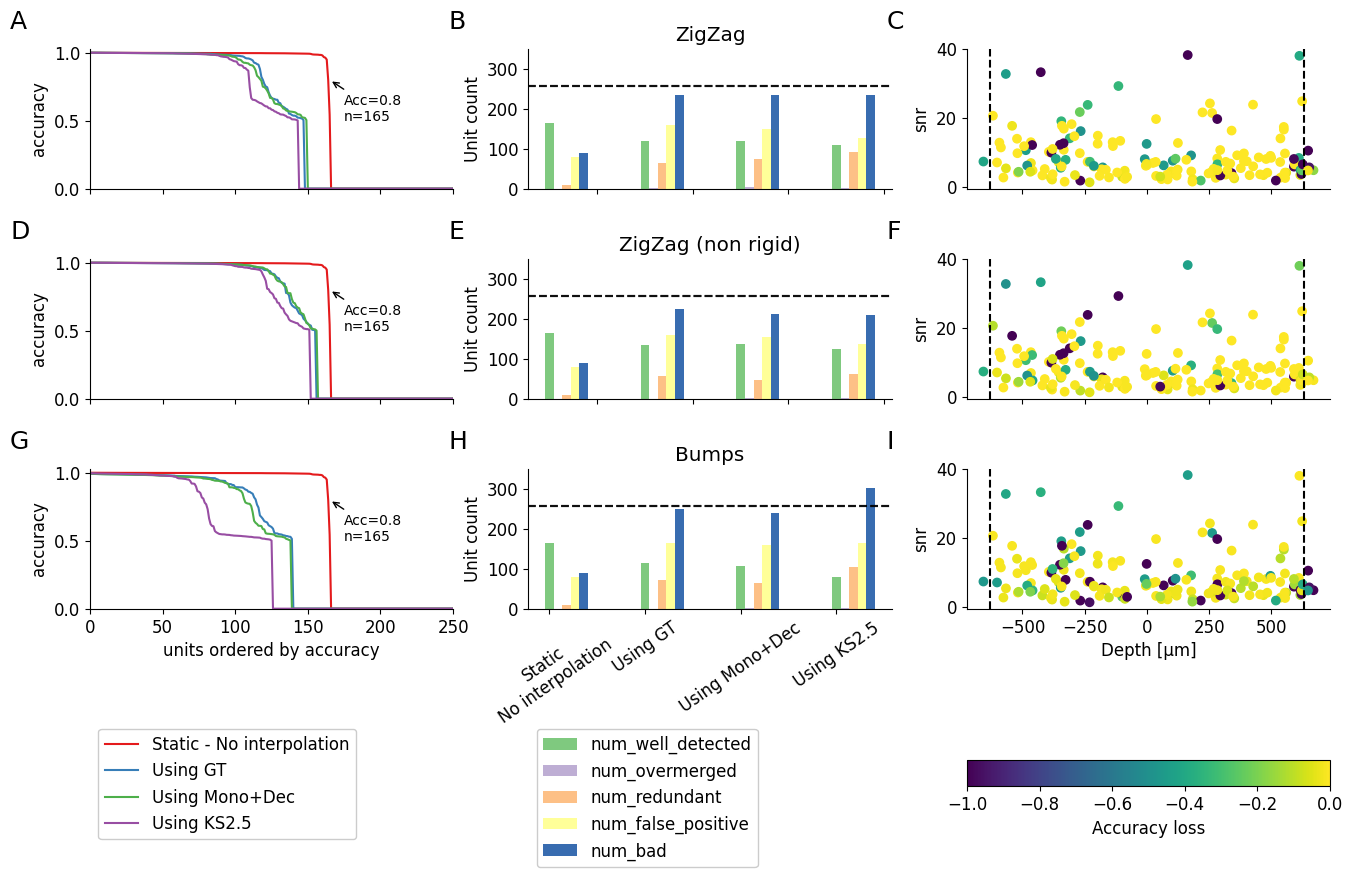

In [12]:
fig = figure_sorting_accuracies(benchmarks, figsize=(16, 10), accuracy_thresh=0.8)
fig.savefig(figure_folder / f'Figure6 sorting accuracies.{ext}')

## ordered accurcies with best merge

Here we are computing a "best merge" knowing the ground truth.
Even, this is not somethign which doable on real data, it show the limit of the theoritical possible accuracies.

**********
('uniform', 'homogeneous', 'rigid')
Static - No interpolation
num_gt                256
num_sorter            246
num_well_detected     165
num_overmerged          0
num_redundant           0
num_false_positive     80
num_bad                80
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using GT
num_gt                256
num_sorter            318
num_well_detected     141
num_overmerged          3
num_redundant           0
num_false_positive    159
num_bad               164
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using Mono+Dec
num_gt                256
num_sorter            309
num_well_detected     142
num_overmerged          3
num_redundant           0
num_false_positive    149
num_bad               151
dtype: int64
**********
('uniform', 'homogeneous', 'rigid')
Using KS2.5
num_gt                256
num_sorter            285
num_well_detected     145
num_overmerged          2
num_redundant           0
num_false_positive    127
num_bad  

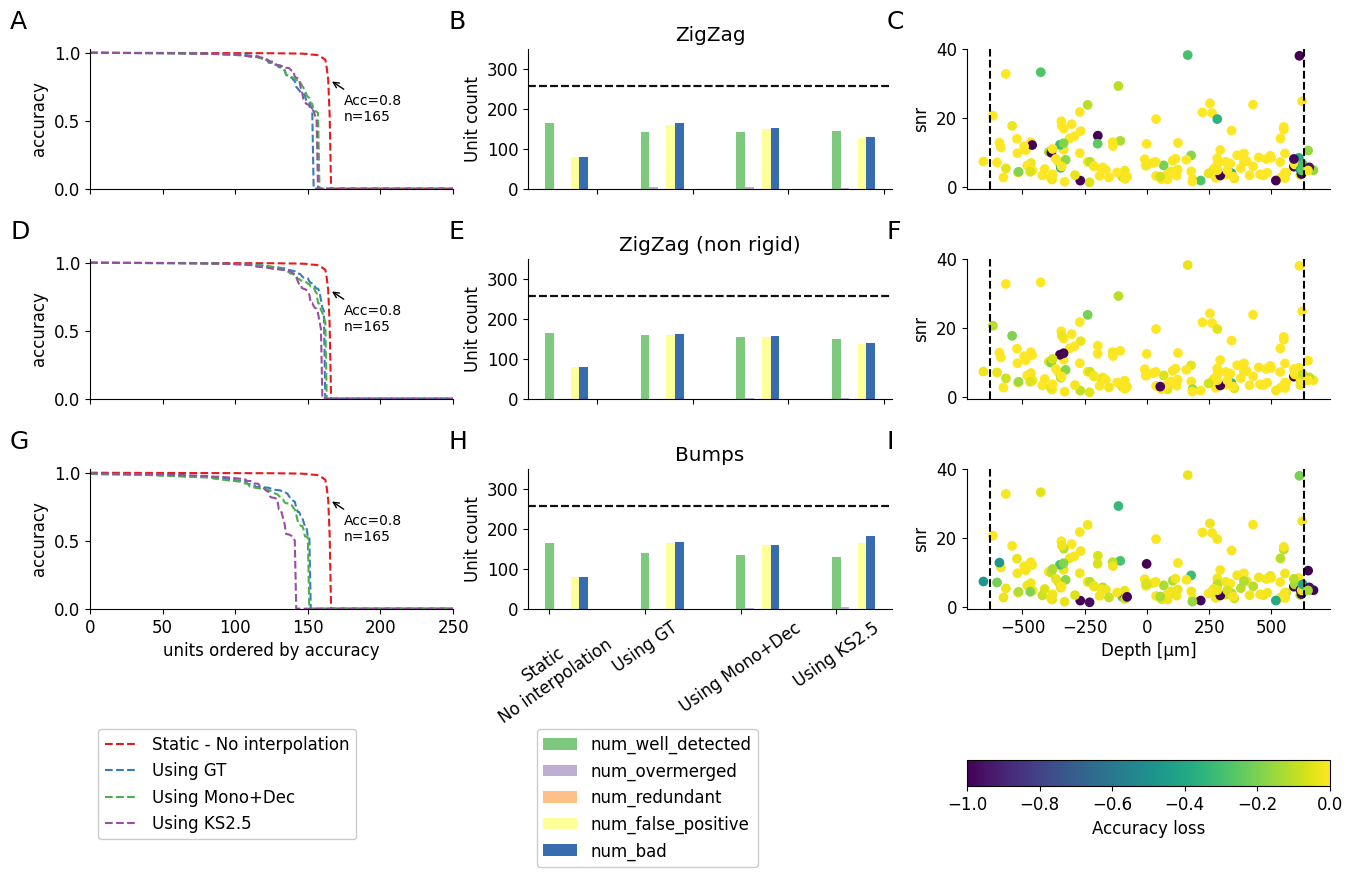

In [13]:
fig = figure_sorting_accuracies_with_best_merge(benchmarks, accuracy_thresh=0.80,
                                                merging_score=0.2, figsize=(16, 10))
fig.savefig(figure_folder / f'FigureSupp3 sorting best merge accuracies.{ext}')